<a href="https://colab.research.google.com/github/amngithub/Healthcare/blob/main/Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Disease Prediction Using Machine Learning

This article aims to implement a robust machine-learning model that can efficiently predict the disease of a human, based on the symptoms that he/she possesses. Let us look into how we can approach this machine-learning problem:

**Approach:**

**Gathering the Data**: Data preparation is the primary step for any machine learning problem. We will be using a dataset from Kaggle for this problem. This dataset consists of two CSV files one for training and one for testing. There is a total of 133 columns in the dataset out of which 132 columns represent the symptoms and the last column is the prognosis.

**Cleaning the Data**: Cleaning is the most important step in a machine learning project. The quality of our data determines the quality of our machine-learning model. So it is always necessary to clean the data before feeding it to the model for training. In our dataset all the columns are numerical, the target column i.e. prognosis is a string type and is encoded to numerical form using a label encoder.

**Model Building**: After gathering and cleaning the data, the data is ready and can be used to train a machine learning model. We will be using this cleaned data to train the Support Vector Classifier, Naive Bayes Classifier, and Random Forest Classifier. We will be using a confusion matrix to determine the quality of the models.

**Inference**: After training the three models we will be predicting the disease for the input symptoms by combining the predictions of all three models. This makes our overall prediction more robust and accurate.
At last, we will be defining a function that takes symptoms separated by commas as input, predicts the disease based on the symptoms by using the trained models, and returns the predictions in a JSON format.

**Implementation:**

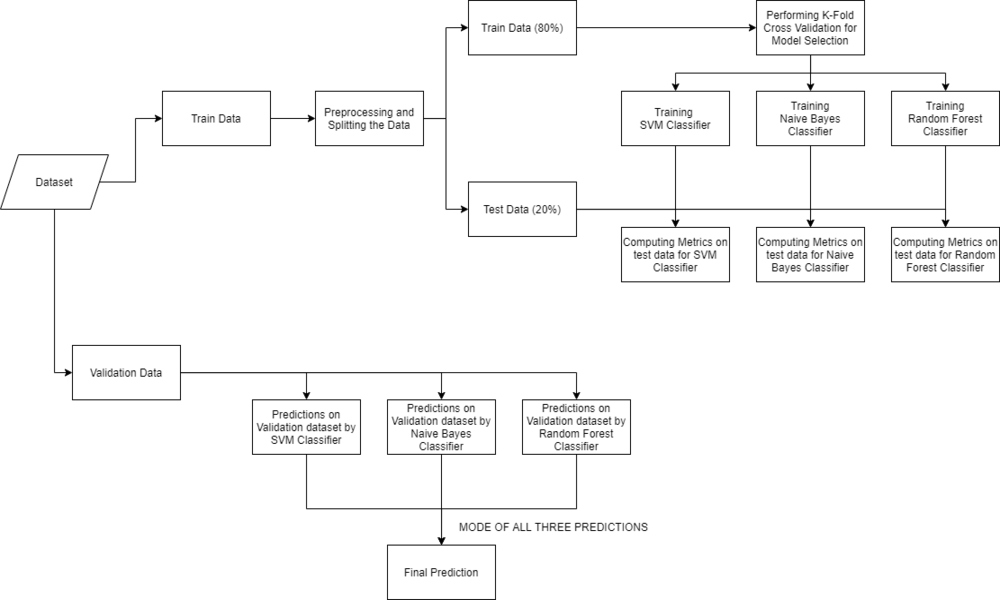

Training and Testing are downloaded and the train.csv, test.csv are put in the dataset folder.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

**Reading the dataset**

Firstly we will be loading the dataset from the folders using the pandas library. While reading the dataset we will be dropping the null column. This dataset is a clean dataset with no null values and all the features consist of 0’s and 1s. Whenever we are solving a classification task it is necessary to check whether our target column is balanced or not. We will be using a bar plot, to check whether the dataset is balanced or not.

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

From the above plot, we can observe that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required. We can notice that our target column i.e. prognosis column is of object datatype, this format is not suitable to train a machine learning model. So, we will be using a label encoder to convert the prognosis column to the numerical datatype. Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

**Splitting the data for training and testing the model**

Now that we have cleaned our data by removing the Null values and converting the labels to numerical format, It’s time to split the data to train and test the model. We will be splitting the data into 80:20 format i.e. 80% of the dataset will be used for training the model and 20% of the data will be used to evaluate the performance of the models.

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

**Model Building**

After splitting the data, we will be now working on the modeling part. We will be using K-Fold cross-validation to evaluate the machine-learning models. We will be using Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier for cross-validation. Before moving into the implementation part let us get familiar with k-fold cross-validation and the machine learning models.

**K-Fold Cross-Validation**: K-Fold cross-validation is one of the cross-validation techniques in which the whole dataset is split into k number of subsets, also known as folds, then training of the model is performed on the k-1 subsets and the remaining one subset is used to evaluate the model performance.

**Support Vector Classifier:** Support Vector Classifier is a discriminative classifier i.e. when given a labeled training data, the algorithm tries to find an optimal hyperplane that accurately separates the samples into different categories in hyperspace.

**Gaussian Naive Bayes Classifier:** It is a probabilistic machine learning algorithm that internally uses Bayes Theorem to classify the data points.

**Random Forest Classifier:** Random Forest is an ensemble learning-based supervised machine learning classification algorithm that internally uses multiple decision trees to make the classification. In a random forest classifier, all the internal decision trees are weak learners, and the outputs of these weak decision trees are combined i.e. mode of all the predictions is as the final prediction.

**Using K-Fold Cross-Validation for model selection **


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

From the above output, we can notice that all our machine learning algorithms are performing very well and the mean scores after k fold cross-validation are also very high. To build a robust model we can combine i.e. take the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one. This approach will help us to keep the predictions much more accurate on completely unseen data. In the below code we will be training all the three models on the train data, checking the quality of our models using a confusion matrix, and then combine the predictions of all three models.

**Building robust classifier by combining all models**

In [ ]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier:{accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier:{accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier:{accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

From the above confusion matrices, we can see that the models are performing very well on the unseen data. Now we will be training the models on the whole train data present in the dataset that we downloaded and then test our combined model on test data present in the dataset.

**Fitting the model on whole data and validating on the Test dataset**

In [ ]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("./Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

#The mode function returns a single value when there is one mode. If there are multiple modes, it returns a list.
#Check to see if the result of mode is a list and index into it accordingly
final_preds = [mode([i,j,k]) if isinstance(mode([i, j, k]), list) else mode([i, j, k]) for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

We can see that our combined model has classified all the data points accurately. We have come to the final part of this whole implementation, we will be creating a function that takes symptoms separated by commas as input and outputs the predicted disease using the combined model based on the input symptoms.

**Creating a function that can take symptoms as input and generate predictions for disease**

In [ ]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))